## Pedro Henrique Pontes Farath - 98608
## Lucca Vilaça Okubo - 551538

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,numero_de_filmes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,1


In [4]:
df_filmes = df[df['type'] == 'Movie']
df_filmes.to_csv('netflix_titles.csv', index=False)

df_filmes.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,numero_de_filmes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,1


## Diversidade de Diretores: 
### Quantos diretores únicos contribuíram para os títulos listados neste conjunto de dados? Qual a média de filmes entre eles?

In [5]:
# 1) Diversidade de diretores
diretores_diferentes = df_filmes['director'].nunique()
print('Neste banco de dados há', diretores_diferentes, 'diretores diferentes') 
num_filmes = len(df_filmes)
media_filmes = num_filmes / diretores_diferentes
print('\nSendo a média de filmes entre eles de:', media_filmes)

Neste banco de dados há 4354 diretores diferentes

Sendo a média de filmes entre eles de: 1.408130454754249



Neste banco de dados, há um total de diretores distintos, e a média de filmes por diretor é calculada dividindo o número total de filmes pelo número de diretores. Essa análise fornece uma visão sobre a diversidade dos diretores e a quantidade média de filmes que cada um dirigiu

## Sobreposição de Gêneros: 
### Quais gêneros aparecem com mais frequência juntos na coluna "listed_in"? Existem combinações específicas que são particularmente comuns ou raras?

In [6]:
# 2) Sobreposição de gêneros
conta_generos = df_filmes['listed_in'].value_counts().reset_index()
print('Os gêneros que mais aparecem são: ')
display(conta_generos.head(3))
print('Já as combinações que menos aparecem são: ')
display(conta_generos.tail(3))

Os gêneros que mais aparecem são: 


,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334


Já as combinações que menos aparecem são: 


,listed_in,count
275,"Children & Family Movies, Comedies, Cult Movies",1
276,"Cult Movies, Dramas, Music & Musicals",1
277,"Cult Movies, Dramas, Thrillers",1



Neste banco de dados, analisamos a frequência de cada gênero. Os gêneros que aparecem com mais frequência foram listados, destacando os três mais comuns. Em contraste, também identificamos os gêneros que são menos frequentes, apresentando as três combinações menos comuns. Isso oferece uma visão sobre quais gêneros são predominantes e quais são mais raros no conjunto de dados.

## Tendências Temporais: 
### Analise a tendência de lançamentos de filmes e séries ao longo dos anos. Houve um aumento ou diminuição notável no número de títulos produzidos em um período específico?

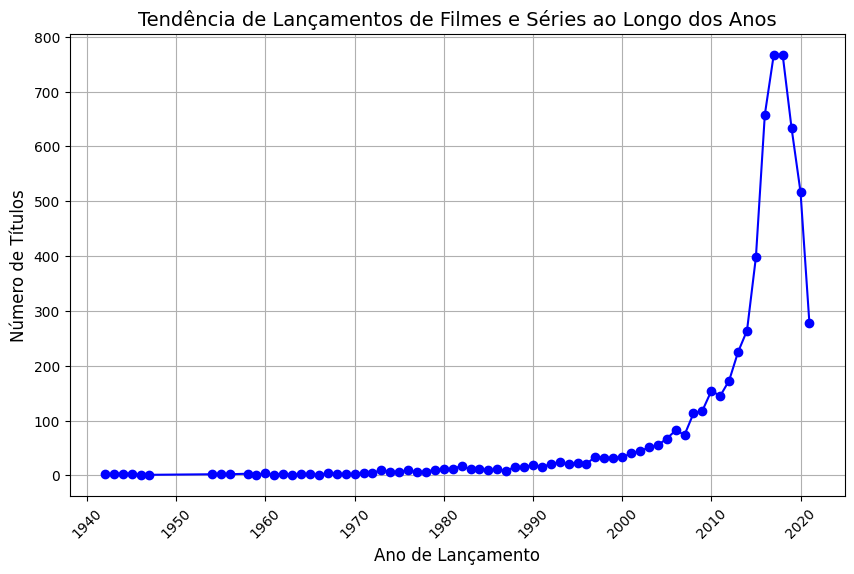

In [7]:
release_trend = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(release_trend.index, release_trend.values, marker='o', linestyle='-', color='b')
plt.title('Tendência de Lançamentos de Filmes e Séries ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Número de Títulos', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Nesta análise podemos ver que os títulos foram lançados em crescimento exponencial ao longo dos anos, até o ano de 2021, no qual houve uma queda de produção dos filmes, provavelmente por causa da Covid-19


## Presença Internacional: 
### Quais países têm os elencos mais diversificados internacionalmente? 

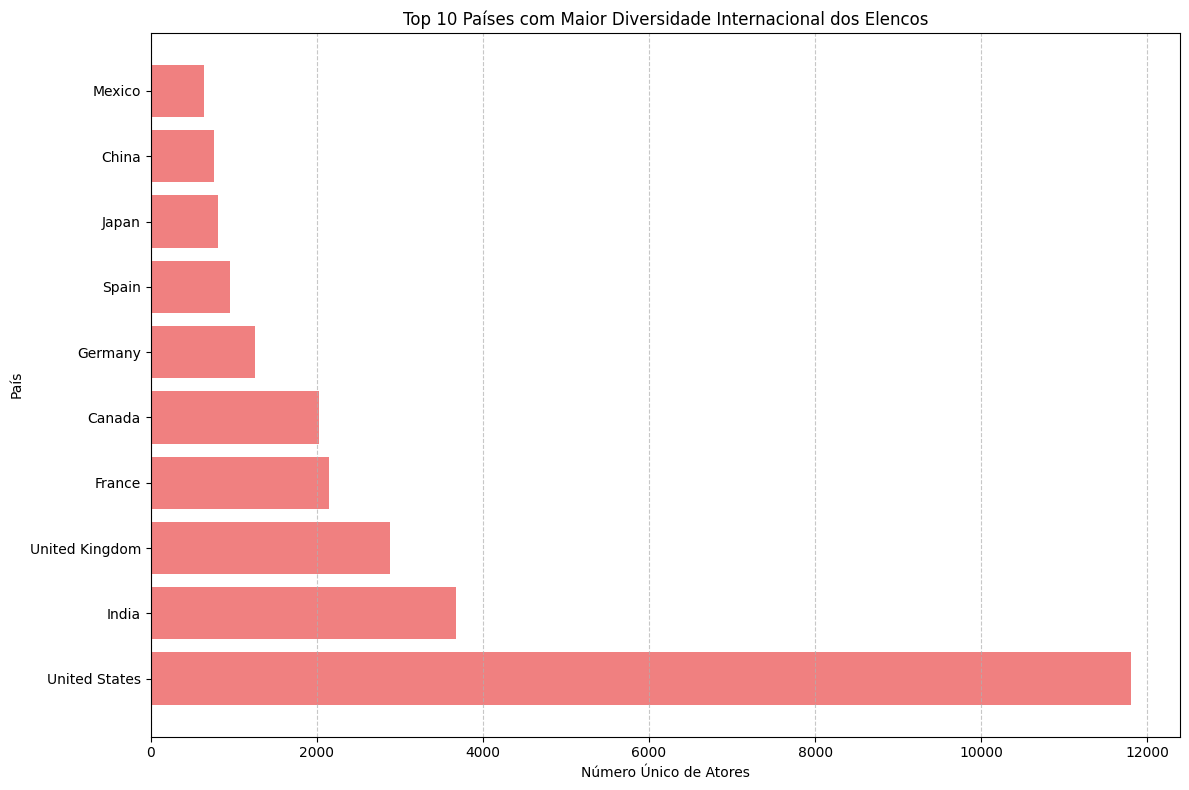

In [8]:
#4)

# Remover valores nulos nas colunas 'country' e 'cast'
df_filmes = df_filmes.dropna(subset=['country', 'cast'])

# Separar múltiplos países e elencos em linhas diferentes
df_filmes['country'] = df_filmes['country'].str.split(', ')
df_filmes = df_filmes.explode('country')

df_filmes['cast'] = df_filmes['cast'].str.split(', ')
df_filmes = df_filmes.explode('cast')

# Contar a diversidade de elencos por país
diversidade_pais = df_filmes.groupby('country')['cast'].nunique().reset_index()
diversidade_pais.columns = ['País', 'Diversidade_Elenco']

# Ordenar por diversidade de elenco
diversidade_pais = diversidade_pais.sort_values(by='Diversidade_Elenco', ascending=False)

# Exibir apenas os top 10 países com maior diversidade de elenco
top_paises = diversidade_pais.head(10)

# Plotar a diversidade de elenco por país
plt.figure(figsize=(12, 8))
plt.barh(top_paises['País'], top_paises['Diversidade_Elenco'], color='lightcoral')
plt.xlabel('Número Único de Atores')
plt.ylabel('País')
plt.title('Top 10 Países com Maior Diversidade Internacional dos Elencos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()




Este código acima analisa a quantidade de atores por países, sendo os 10 países que mais possuem atores em filmes. Observando-o podemos ver que, disparadamente, os Estados Unidos lideram esta lista, muito provavelmente por causa de Hollywood, e a India logo atrás, muito provavelmente por Bollywood 

## Conteúdo Global:
### Há uma tendência de esses países produzirem conteúdo mais atraente globalmente?

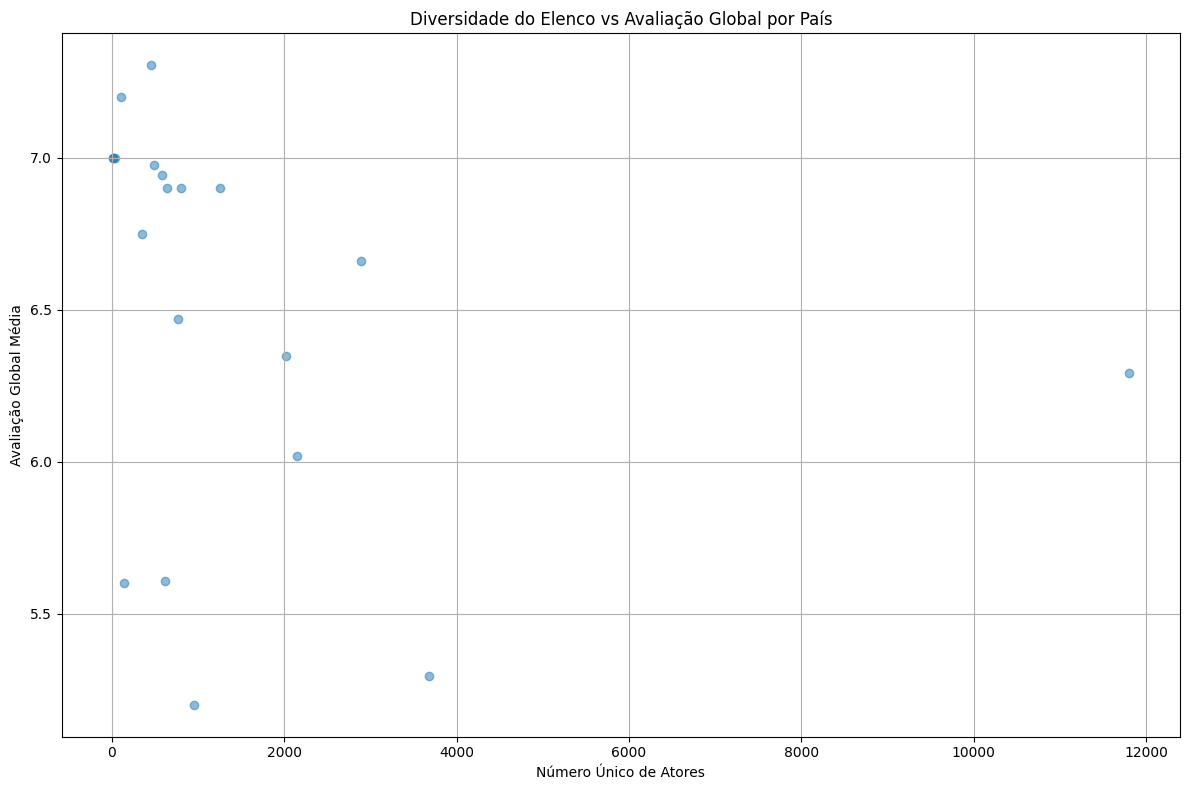

In [9]:
#5)

# Função para obter avaliação de um título usando a API OMDb
def get_imdb_rating(title, api_key):
    url = "http://www.omdbapi.com/"
    params = {
        't': title,
        'apikey': api_key
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    if data['Response'] == 'True':
        return pd.to_numeric(data.get('imdbRating', 'N/A'), errors='coerce')
    else:
        return None

# Defina a chave da API OMDb
api_key = '66dfd07e'

# Remover valores nulos nas colunas 'country' e 'cast'
df_filmes = df_filmes.dropna(subset=['country', 'cast', 'title'])

# Separar múltiplos países e elencos em linhas diferentes
df_filmes['country'] = df_filmes['country'].str.split(', ')
df_filmes = df_filmes.explode('country')

df_filmes['cast'] = df_filmes['cast'].str.split(', ')
df_filmes = df_filmes.explode('cast')

# Limitar o número de filmes para evitar solicitações excessivas
filmes_amostra = df_filmes['title'].unique()[:100]  # Limitar a 100 filmes como exemplo

# Obter avaliações globais e adicionar ao DataFrame
def get_movie_ratings(titles, api_key):
    ratings = []
    for title in titles:
        rating = get_imdb_rating(title, api_key)
        ratings.append({'Title': title, 'Rating': rating})
    
    ratings_df = pd.DataFrame(ratings)
    return ratings_df

# Adicionar avaliações ao DataFrame
ratings_df = get_movie_ratings(filmes_amostra, api_key)
df_filmes_ratings = pd.merge(df_filmes, ratings_df, left_on='title', right_on='Title', how='left')

# Adicionar a coluna de avaliação global
df_filmes_ratings['global_rating'] = pd.to_numeric(df_filmes_ratings['Rating'], errors='coerce')

# Calcular a média da avaliação global por país
avaliacao_global_pais = df_filmes_ratings.groupby('country')['global_rating'].mean().reset_index()
avaliacao_global_pais.columns = ['País', 'Avaliação_Global']

# Calcular a diversidade de elenco por país
diversidade_pais = df_filmes_ratings.groupby('country')['cast'].nunique().reset_index()
diversidade_pais.columns = ['País', 'Diversidade_Elenco']

# Mesclar com a diversidade de elenco
pais_analise = pd.merge(diversidade_pais, avaliacao_global_pais, on='País')

# Remover valores nulos
pais_analise = pais_analise.dropna(subset=['Avaliação_Global', 'Diversidade_Elenco'])
pais_analise = pais_analise[pais_analise['Avaliação_Global'].apply(pd.to_numeric, errors='coerce').notnull()]
pais_analise = pais_analise[pais_analise['Diversidade_Elenco'].apply(pd.to_numeric, errors='coerce').notnull()]

# Plotar a diversidade de elenco versus avaliação global
plt.figure(figsize=(12, 8))
plt.scatter(pais_analise['Diversidade_Elenco'], pais_analise['Avaliação_Global'], alpha=0.5)
plt.xlabel('Número Único de Atores')
plt.ylabel('Avaliação Global Média')
plt.title('Diversidade do Elenco vs Avaliação Global por País')
plt.grid(True)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


Como podemos ver o gráfico, a diversidade do elenco não se reflete muito na avaliação do país globalmente

## Envelhecimento do Conteúdo: 
### Como o ano médio de lançamento difere entre os diferentes gêneros? Filmes ou séries mais antigos são mais propensos a pertencer a determinados gêneros?

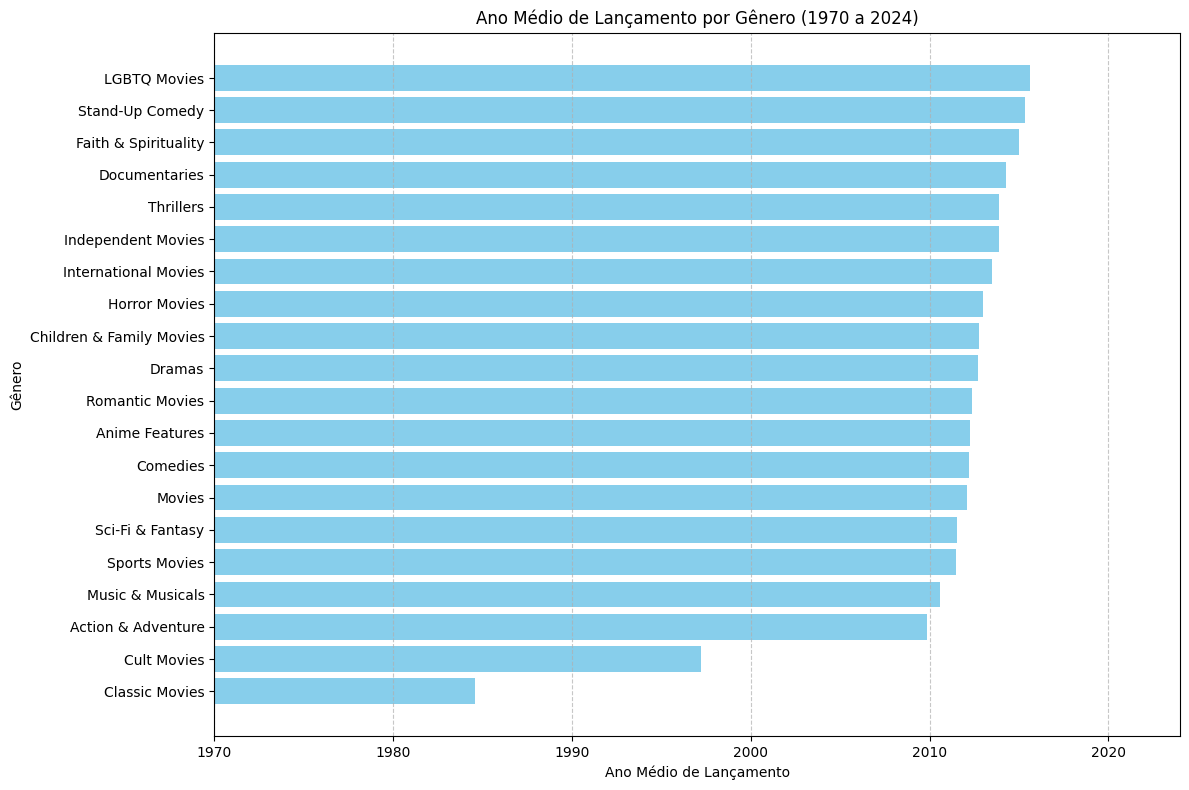

In [10]:
#6) Envelhecimento do Conteúdo 


# Remover valores nulos nas colunas 'listed_in' e 'release_year'
df_filmes = df_filmes.dropna(subset=['listed_in', 'release_year'])

# Separar múltiplos gêneros em linhas diferentes
df_filmes['listed_in'] = df_filmes['listed_in'].str.split(', ')
df_filmes = df_filmes.explode('listed_in')

# Converter 'release_year' para inteiro
df_filmes['release_year'] = df_filmes['release_year'].astype(int)

# Filtrar anos a partir de 1970
df_filmes = df_filmes[df_filmes['release_year'] >= 1970]

# Calcular o ano médio de lançamento por gênero
ano_medio_por_genero = df_filmes.groupby('listed_in')['release_year'].mean().reset_index()
ano_medio_por_genero.columns = ['Gênero', 'Ano_Médio']

# Ordenar por ano médio de lançamento
ano_medio_por_genero = ano_medio_por_genero.sort_values(by='Ano_Médio')

# Plotar o ano médio de lançamento por gênero
plt.figure(figsize=(12, 8))
plt.barh(ano_medio_por_genero['Gênero'], ano_medio_por_genero['Ano_Médio'], color='skyblue')
plt.xlabel('Ano Médio de Lançamento')
plt.ylabel('Gênero')
plt.title('Ano Médio de Lançamento por Gênero (1970 a 2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Definir limites do eixo x
plt.xlim(1970, 2024)

plt.tight_layout() 
plt.show()



A análise do envelhecimento do conteúdo revela o ano médio de lançamento dos filmes por gênero, considerando apenas lançamentos a partir de 1970. A visualização gráfica mostra a média dos anos de lançamento para diferentes gêneros, permitindo observar quais gêneros tendem a ser mais antigos ou mais recentes. O gráfico é ajustado para exibir anos de 1970 a 2024, facilitando a comparação da evolução dos gêneros ao longo do tempo.

## Sucesso por Diretor: 
### Existem certos diretores cujo trabalho aparece com mais frequência neste conjunto de dados?

In [11]:
# 7) Sucesso por diretor 

# Triando valores nulos nas colunas 
df_filmes = df_filmes.dropna(subset=['director', 'listed_in'])

# Isolando as colunas relevantes em linhas diferentes
df_filmes['director'] = df_filmes['director'].str.split(', ')
df_filmes = df_filmes.explode('director')

df_filmes['listed_in'] = df_filmes['listed_in'].str.split(', ')
df_filmes = df_filmes.explode('listed_in')

# Conta a frequência de cada diretor
conta_diretor = df_filmes['director'].value_counts().reset_index()
conta_diretor.columns = ['Director', 'Produções']

conta_diretor.head(5)

,Director,Produções
0,Martin Scorsese,392
1,Cathy Garcia-Molina,356
2,Steven Spielberg,355
3,Lars von Trier,336
4,Raja Gosnell,308


Esse código realiza uma análise detalhada sobre a produtividade dos diretores na plataforma Netflix. O retorno final revela os diretores que têm o maior número de produções disponíveis no catálogo da Netflix. Através dessa análise, podemos identificar diretores altamente ativos, assim como associar sua produção a diferentes gêneros, uma vez que também foi feita a "explosão" de gêneros.

## Gêneros dos diretores:
### Esses diretores trabalham predominantemente em gêneros específicos?

In [12]:
#8) 
# Selecionar os 5 diretores com mais produções
top_diretores = conta_diretor.head(5)['Director']

# Filtrar o DataFrame original para apenas esses diretores
df_top_diretores = df_filmes[df_filmes['director'].isin(top_diretores)]

# Contar a frequência de cada gênero para esses diretores
conta_diretor_genero = df_top_diretores.groupby(['director', 'listed_in']).size().reset_index(name='Contagem_de_Genero')

# Encontrar o gênero mais frequente para cada um dos diretores principais
genero_comum = conta_diretor_genero.loc[conta_diretor_genero.groupby('director')['Contagem_de_Genero'].idxmax()]

# Renomear as colunas para maior clareza
genero_comum.columns = ['Director', 'Genero_Mais_Frequente', 'Contador_de_Generos']

# Mostrar os resultados
genero_comum



,Director,Genero_Mais_Frequente,Contador_de_Generos
2,Cathy Garcia-Molina,International Movies,125
4,Lars von Trier,Dramas,112
11,Martin Scorsese,Dramas,154
16,Raja Gosnell,Children & Family Movies,154
21,Steven Spielberg,Dramas,140


Esse dado mostra o gênero mais frequente dos diretores famosos desse DataFrame, podemos ver tambem que comparado ao dado 7, o contador diminui muito, pois são vários gêneros distintos que são trabalhados pelos mesmos diretores

## Títulos bem sucedidos:
### Quão bem-sucedidos são os títulos mais recentes dos tais diretores (medidos por classificação)?

In [13]:
#9) 

# Lista de filmes para vários diretores
diretores_filmes = {
    'Martin Scorsese': ['The Irishman', 'The Wolf of Wall Street', 'Shutter Island'],
    'Cathy Garcia-Molina': ['Hello Love Goodbye', 'Seven Sundays', 'My Amnesia Girl'],
    'Steven Spielberg': ['Jurassic Park', 'E.T. the Extra-Terrestrial', 'Schindler\'s List'],
    'Lars von Trier': ['Melancholia', 'Dogville', 'Nymphomaniac'],
    'Raja Gosnell': ['Beverly Hills Chihuahua', 'Scooby-Doo', 'Home Alone 3']
}


# Função para obter a avaliação de um título da API OMDb
def get_imdb_rating(title, api_key):
    url = "http://www.omdbapi.com/"
    params = {
        't': title,
        'apikey': api_key
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    if data['Response'] == 'True':
        return {
            'Title': data.get('Title', 'N/A'),
            'Rating': data.get('imdbRating', 'N/A'),
            'Metascore': data.get('Metascore', 'N/A'),
            'Year': int(data.get('Year', '0'))  # Convertendo para inteiro
        }
    else:
        return {'Title': title, 'Rating': 'N/A', 'Metascore': 'N/A', 'Year': 0}  # Usando 0 para falhas

# Sua chave de API OMDb
api_key = '66dfd07e'

# Função para obter o filme mais recente de um diretor
def get_latest_movie_for_director(director, api_key):
    filmes = diretores_filmes.get(director, [])
    
    if not filmes:
        return {'Director': director, 'Title': 'N/A', 'Rating': 'N/A', 'Metascore': 'N/A', 'Year': 'N/A'}
    
    # Obter detalhes de todos os filmes
    filmes_details = [get_imdb_rating(filme, api_key) for filme in filmes]
    
    # Ordenar filmes por ano e pegar o mais recente
    filmes_sorted = sorted(filmes_details, key=lambda x: x.get('Year', 0), reverse=True)
    
    if filmes_sorted:
        return {**filmes_sorted[0], 'Director': director}
    else:
        return {'Director': director, 'Title': 'N/A', 'Rating': 'N/A', 'Metascore': 'N/A', 'Year': 'N/A'}

# Obter informações sobre o filme mais recente de cada diretor
dados_filmes_recentes = [get_latest_movie_for_director(diretor, api_key) for diretor in diretores_filmes]

# Criar um DataFrame com os dados
df_filmes_recentes = pd.DataFrame(dados_filmes_recentes)

# Exibir os resultados
df_filmes_recentes



,Title,Rating,Metascore,Year,Director
0,The Irishman,7.8,94,2019,Martin Scorsese
1,"Hello, Love, Goodbye",7.3,N/A,2019,Cathy Garcia-Molina
2,Jurassic Park,8.2,68,1993,Steven Spielberg
3,Melancholia,7.1,81,2011,Lars von Trier
4,Beverly Hills Chihuahua,3.9,41,2008,Raja Gosnell


Como podemos ver, os títulos mais recentes dos diretores tem uma classificação razoável, sendo uma média de 6.8

## Análise das Descrições: 
### Realize uma análise de texto na coluna "description" para identificar temas comuns, palavras-chave ou sentimentos em diferentes gêneros ou regiões. Existem diferenças significativas na forma como o conteúdo é comercializado com base nessas descrições?

In [14]:
# 10) Analise das descrições 
df_aux10 = df_filmes
palavras_selecionadas = ['woman', 'man', 'try', 'romance', 'teen', 'terror', 'house', 'love', 'cia', 'comedy']

genero_escolhido = 'International Movies'
df_filtered = df_aux10[df_aux10['listed_in'].str.contains(genero_escolhido, case=False, na=False)]

def conta_palavras(descricao, palavras):
    contagem = {}
    for palavra in palavras:
        contagem[palavra] = descricao.lower().count(palavra.lower())
    return pd.Series(contagem)

frequencias = df_filtered['description'].apply(lambda x: conta_palavras(x, palavras_selecionadas))
total = frequencias.sum()

print(total)

woman      2578
man        8128
try         860
romance     392
teen       1467
terror      462
house       346
love       3000
cia        1403
comedy      185
dtype: int64


A análise das descrições examina a frequência de certas palavras-chave em descrições de filmes dentro de um gênero específico, como "International Movies". Para isso, o código filtra o DataFrame para incluir apenas filmes desse gênero e conta a ocorrência de palavras selecionadas nas descrições. As palavras selecionadas incluem termos como 'woman', 'man', 'romance', entre outros. O resultado final é uma contagem total de quantas vezes cada palavra aparece nas descrições dos filmes desse gênero.